# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

***Last semster, I worked with the dataset below about how weather affects solar power generation. I work in a renewable energy company that works with commercial solar projects. The company greatly benefits from such weather related data. For example, more sunny days are directly associated with higher energy production. Here's how the data story would work on this dataset;

https://www.kaggle.com/datasets/pythonafroz/solar-powe-generation-data?select=Solar%2BPower%2BPlant%2BData.csv

Who: Let's say Project Planning and Development (PPD) committee would present this data to the Board of Directors (BoD) to approve additional projects  
What: PPD would propose potential financially benefitical solar projects that need to be approved by the BoD   
How: PPD would show weather related data for the project location to prove that it would produce enough energy to bring in profits for the company.  

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
#Importing the dataset

solar = pd.read_csv("Solar Power Plant Data.csv")


In [4]:
#Summarizing the datasets

solar.info()
solar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [5]:
#Finding duplicates

Duplicates = solar[solar.duplicated()]

print(Duplicates)

Empty DataFrame
Columns: [Date-Hour(NMT), WindSpeed, Sunshine, AirPressure, Radiation, AirTemperature, RelativeAirHumidity, SystemProduction]
Index: []


There seems to be no duplicated rows in solar dataframe. And based on the dataset, I don't think it is fruitful to look for duplicated values in a single column. 

In [6]:
# Mean of each column
mean_solar = solar.mean(numeric_only=True)

median_solar = solar.median(numeric_only=True)

mode_solar = solar.mode(numeric_only=True).iloc[0]

print("Mean:\n", mean_solar)
print("\nMedian:\n", median_solar)
print("\nMode:\n", mode_solar)


Mean:
 WindSpeed                 2.639823
Sunshine                 11.180479
AirPressure            1010.361781
Radiation                97.538493
AirTemperature            6.978893
RelativeAirHumidity      76.719406
SystemProduction        684.746071
dtype: float64

Median:
 WindSpeed                 2.3
Sunshine                  0.0
AirPressure            1011.0
Radiation                -1.4
AirTemperature            6.4
RelativeAirHumidity      82.0
SystemProduction          0.0
dtype: float64

Mode:
 WindSpeed                 1.8
Sunshine                  0.0
AirPressure            1011.0
Radiation                -6.2
AirTemperature           -0.7
RelativeAirHumidity     100.0
SystemProduction          0.0
Name: 0, dtype: float64


In [7]:
# Based on the info(), there should not be any null values. But double-checking for null values.

print(solar.isnull().values.any())

False


Cannot perform one-hot encoding as the dataset does not contain any categorical variable column. 

Conclusion: the dataset seems to be fine. However, it is not useful for machine learning methods such as one-hot encoding. The data is straight forward, but is not useful for this course. Will need to find a separate dataset.  

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Text(0.5, 1.0, 'Shunsine vs Solar Energy Production')

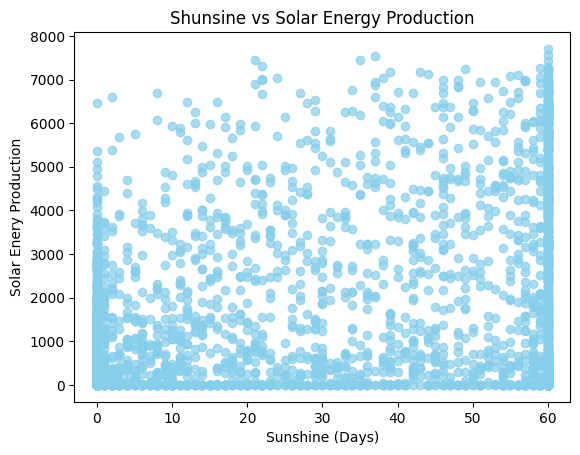

In [24]:
import matplotlib.pyplot as plt
#Re-creating a scatterplot to show correlation between sunny days and solar energy production

x = solar["Sunshine"]
y = solar["SystemProduction"]

# Create scatter plot
plt.scatter(x, y, color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel("Sunshine (Days)")
plt.ylabel("Solar Enery Production")
plt.title("Shunsine vs Solar Energy Production")

It seems like the data in the graph above is all over the place. For example, there are some solar production on not so sunny days as well, but the production amount is limited. Net solar production on >0 sunny days outweighs solar production on 0 sunny days. This proves that solar production mostly depends on sunshine, along with some other weather related factors. 